In [30]:
import pandas as pd
import numpy as np

In [5]:
directory = "twitter/"  # Replace with the actual path to your directory

# Construct the file pattern to match
pattern = os.path.join(directory, "*.featnames")

# Get a list of filenames that match the pattern
filenames = glob.glob(pattern)

nodeIds = []
for filename in filenames:
    starting_index = filename.find("/")+1
    ending_index = filename.find(".")
    nodeIds.append(int(filename[starting_index:ending_index]))

In [6]:
nodeIds

[207594668,
 111374622,
 96483973,
 7875912,
 14147754,
 191896931,
 80317145,
 16674149,
 61086747,
 9460682,
 163491360,
 167901620,
 49536244,
 185512077,
 86799233,
 276843589,
 198941747,
 43003845,
 14371740,
 227650565,
 18718580,
 233598791,
 16105942,
 5506012,
 14372763,
 18119683,
 15335809,
 37723441,
 629863,
 120459837,
 52772629,
 27853708,
 15053535,
 8768832,
 14422788,
 47673661,
 13811562,
 14256927,
 14917050,
 84114921,
 68480165,
 21578499,
 104324908,
 77404713,
 16305227,
 200214366,
 9215692,
 159629146,
 40981798,
 241635675,
 37103386,
 204145356,
 31457243,
 15473958,
 276128869,
 279854450,
 317313520,
 321652589,
 21437537,
 24903302,
 253360762,
 20179628,
 926981,
 18226205,
 179065820,
 151246522,
 74651704,
 778446,
 320527944,
 64619842,
 441252694,
 289738351,
 37170886,
 62759402,
 16297193,
 80660928,
 14791232,
 48132655,
 17135931,
 17403755,
 532617990,
 227785045,
 484991854,
 120157205,
 1775731,
 19208450,
 17022544,
 7890392,
 356897757,
 24

## Data representation

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the dataset
edges = []
with open("twitter_combined.txt", "r") as file:
    for line in file:
        source, target = line.strip().split()
        edges.append((int(source), int(target)))

## edges selection

In [7]:
selected_edges = []
for edge in edges:
    if (edge[0] in nodeIds) and (edge[1] in nodeIds):
        selected_edges.append(edge)
selected_edges

[(324201646, 40981798),
 (314316607, 430313102),
 (43003845, 314316607),
 (314316607, 187773078),
 (148519842, 195475105),
 (148519842, 86799233),
 (187773078, 314316607),
 (152388029, 158419434),
 (314316607, 43003845),
 (307458983, 18996905),
 (40981798, 18951737),
 (265077741, 40981798),
 (195475105, 43003845),
 (314316607, 307458983),
 (312284236, 40981798),
 (430313102, 18996905),
 (195475105, 187773078),
 (195475105, 148519842),
 (307458983, 158419434),
 (189875309, 148519842),
 (187773078, 40981798),
 (307458983, 166214735),
 (355823615, 43003845),
 (250340951, 18996905),
 (250340951, 430313102),
 (158419434, 40981798),
 (248883350, 229425177),
 (195475105, 206923844),
 (59588845, 43003845),
 (152388029, 355823615),
 (59588845, 70492333),
 (160237722, 314316607),
 (187773078, 307458983),
 (160237722, 18996905),
 (158419434, 430313102),
 (314316607, 229425177),
 (222090651, 57828817),
 (152388029, 40981798),
 (179138862, 18996905),
 (229425177, 40981798),
 (195475105, 248883350),

In [9]:
len(selected_edges)

16428

In [10]:
edges = selected_edges

In [11]:
# Step 2: Create a graph representation
graph = nx.Graph()
graph.add_edges_from(edges)


In [12]:
# Step 3: Plot a subset of the graph
subset_nodes = list(graph.nodes)[:1000]  # Select the first 1000 nodes for visualization

subset_graph = graph.subgraph(subset_nodes)

In [13]:
# Use Circular layout for better performance with large graphs
pos = nx.spring_layout(subset_graph)

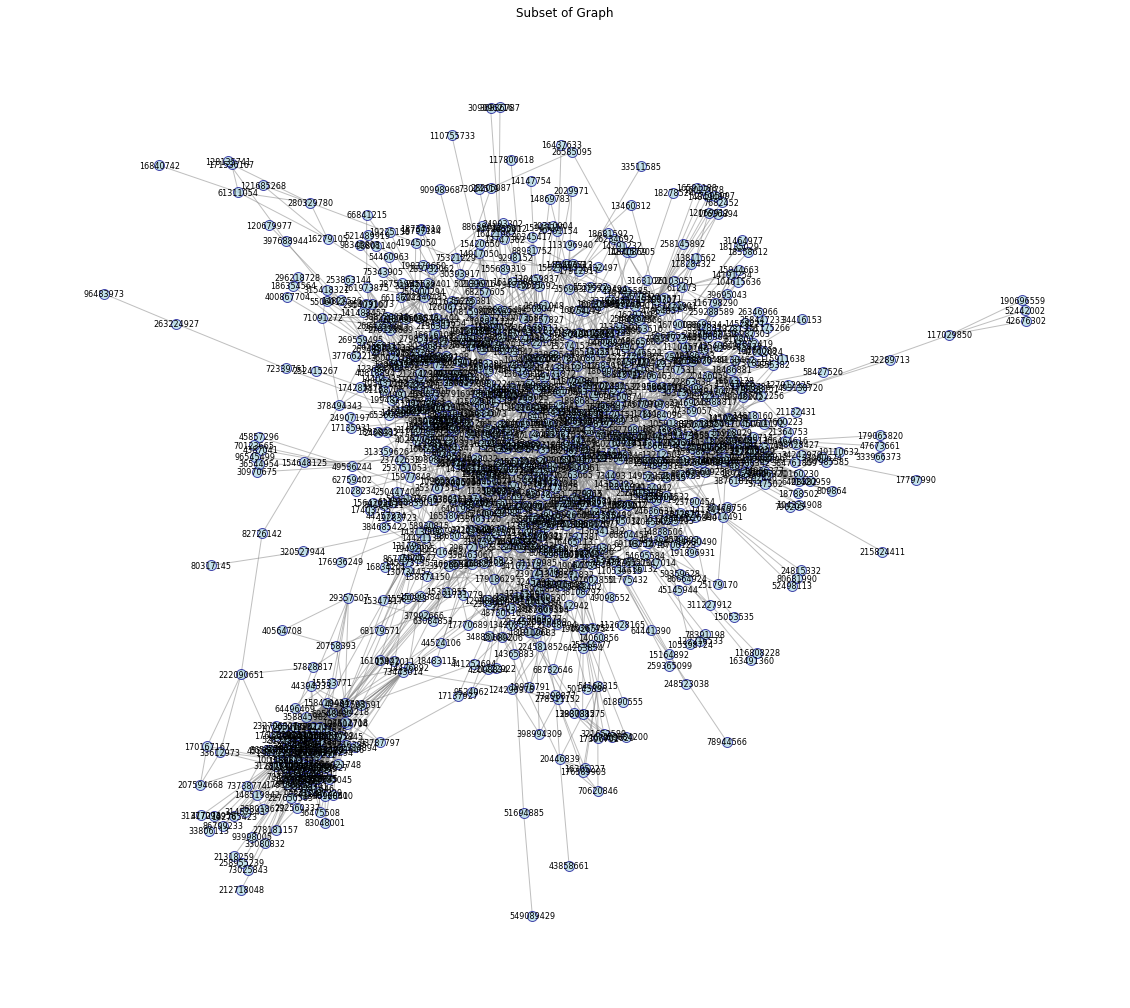

In [14]:
plt.figure(figsize=(20, 18))

# Draw nodes with custom style
nx.draw_networkx_nodes(subset_graph, pos, node_color='lightblue', node_size=100, alpha=0.7, edgecolors='darkblue')

# Draw edges with custom style
nx.draw_networkx_edges(subset_graph, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels for nodes
nx.draw_networkx_labels(subset_graph, pos, font_size=8, font_color='black')

plt.axis('off')
plt.title('Subset of Graph')
plt.show()

# Metrics

In [16]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(graph)
print("Degree Centrality:", degree_centrality)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(graph)
print("Closeness Centrality:", closeness_centrality)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality: {324201646: 0.005149330587023687, 40981798: 0.09577754891864057, 314316607: 0.02265705458290422, 430313102: 0.013388259526261586, 43003845: 0.0854788877445932, 187773078: 0.04634397528321318, 148519842: 0.009268795056642637, 195475105: 0.04531410916580844, 86799233: 0.0020597322348094747, 152388029: 0.013388259526261586, 158419434: 0.03089598352214212, 307458983: 0.027806385169927908, 18996905: 0.05046343975283213, 18951737: 0.02368692070030896, 265077741: 0.01132852729145211, 312284236: 0.009268795056642637, 189875309: 0.017507723995880534, 166214735: 0.01544799176107106, 355823615: 0.009268795056642637, 250340951: 0.010298661174047374, 248883350: 0.018537590113285273, 229425177: 0.013388259526261586, 206923844: 0.024716786817713696, 59588845: 0.008238928939237899, 70492333: 0.021627188465499485, 160237722: 0.01544799176107106, 222090651: 0.005149330587023687, 57828817: 0.003089598352214212, 179138862: 0.012358393408856848, 102765423: 0.0020597322348094747, 11522138

Closeness Centrality: {324201646: 0.24507824331145886, 40981798: 0.31423948220064724, 314316607: 0.24427672955974844, 430313102: 0.24372489959839358, 43003845: 0.27918343875790685, 187773078: 0.24701093869244467, 148519842: 0.1995068830901993, 195475105: 0.24594731509625126, 86799233: 0.19836567926455567, 152388029: 0.24719959266802444, 158419434: 0.2533263762066267, 307458983: 0.24396984924623116, 18996905: 0.24910210364289379, 18951737: 0.2448310640443772, 265077741: 0.24275, 312284236: 0.2425680739445416, 189875309: 0.24366373902132998, 166214735: 0.24305381727158948, 355823615: 0.243175557225144, 250340951: 0.24118231495280676, 248883350: 0.2417226786158825, 229425177: 0.2412422360248447, 206923844: 0.24446122860020142, 59588845: 0.24094292803970224, 70492333: 0.241662518666003, 160237722: 0.2439085656870133, 222090651: 0.20489554758387846, 57828817: 0.2179084380610413, 179138862: 0.24106256206554122, 102765423: 0.19860912251994273, 115221382: 0.24052514243249937, 19933035: 0.24052

Betweenness Centrality: {324201646: 0.0005607836613254764, 40981798: 0.1512755536868329, 314316607: 0.00011084049195793935, 430313102: 3.10769064552072e-05, 43003845: 0.033133818083740746, 187773078: 0.0033505177928954437, 148519842: 4.019763948275999e-05, 195475105: 0.008183757960488572, 86799233: 0.0, 152388029: 0.0018317731515252492, 158419434: 0.0062851708335133856, 307458983: 0.00014026486359690983, 18996905: 0.001754069789834123, 18951737: 0.0004269058492280863, 265077741: 1.388428756172177e-05, 312284236: 1.9712092918083967e-05, 189875309: 0.0003825549790914846, 166214735: 2.9693095814092678e-05, 355823615: 0.0003101880204472878, 250340951: 7.443951136196987e-06, 248883350: 4.38113704559573e-05, 229425177: 1.3803991904707748e-05, 206923844: 0.00027356650996722176, 59588845: 0.00041035540709721656, 70492333: 0.002138274411623507, 160237722: 0.00020915605276350266, 222090651: 0.0010360575158757076, 57828817: 0.0006064653762064092, 179138862: 0.0013816277663890643, 102765423: 0.0, 

In [32]:
df = pd.read_csv("properties.csv")

In [33]:
df["Degree Centrality"]=np.nan
df["Closeness Centrality"]=np.nan
df["Betweenness Centrality"]=np.nan

In [34]:
for item,value in degree_centrality.items():
    df.loc[df["nodeId"]==item, "Degree Centrality"]=value
for item,value in closeness_centrality.items():
    df.loc[df["nodeId"]==item, "Closeness Centrality"]=value
for item,value in betweenness_centrality.items():
    df.loc[df["nodeId"]==item, "Betweenness Centrality"]=value

In [35]:
df

,nodeId,#OCTAVIA,#THEHELP,#ff,@BAFTA,@FuckYesEmma,@JUDAOcombr,@astowellcom,@emmastonebr,@helpmovie,...,@chero666,@chococat,"@dannyBstyle,",@jon_blaze55,@kylepulver:,@terrycavanagh,@twitchtv.,Degree Centrality,Closeness Centrality,Betweenness Centrality
0,207594668,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0.003090,0.198406,0.000000
1,111374622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.007209,0.263429,0.000430
2,96483973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001030,0.150683,0.000000
3,7875912,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.009269,0.299137,0.001905
4,14147754,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001030,0.212148,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,14528221,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001030,0.238165,0.000000
969,14840869,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.003090,0.239990,0.001701
970,82726142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.002060,0.206245,0.000958
971,255790981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.009269,0.273984,0.002988


In [42]:
df.dropna(inplace=True)

In [43]:
df.to_csv("dataset.csv",index=False)

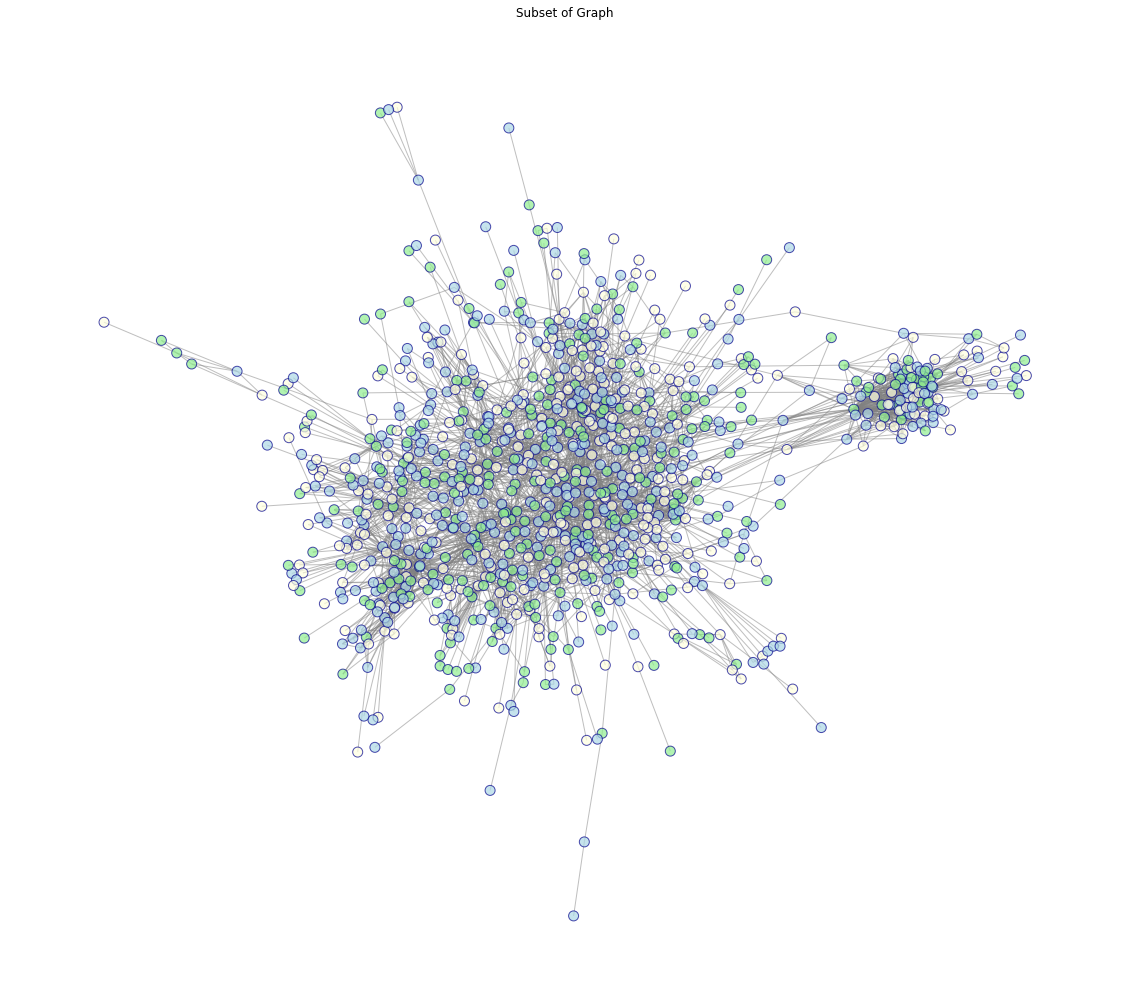

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 2: Create a graph representation
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 3: Plot a subset of the graph
subset_nodes = list(graph.nodes)[:1000]  # Select the first 1000 nodes for visualization

subset_graph = graph.subgraph(subset_nodes)
# Use Circular layout for better performance with large graphs
pos = nx.spring_layout(subset_graph)

# Define color mapping for the three clusters
cluster_colors = {0: 'lightblue', 1: 'lightgreen', 2: 'lightyellow'}

plt.figure(figsize=(20, 18))

# Draw nodes with custom style
node_colors = [cluster_colors[labels[node_encoding[node]]] for node in subset_graph.nodes]
nx.draw_networkx_nodes(subset_graph, pos, node_color=node_colors, node_size=100, alpha=0.7, edgecolors='darkblue')

# Draw edges with custom style
nx.draw_networkx_edges(subset_graph, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels for nodes without node IDs
labels = {node: '' for node in subset_graph.nodes}
nx.draw_networkx_labels(subset_graph, pos, labels=labels, font_size=8, font_color='black')

plt.axis('off')
plt.title('Subset of Graph')
plt.show()


In [59]:
def cluster_and_evaluate(model_type, num_clusters, data, **kwargs):
    """
    Cluster the data using the specified model and evaluate the clustering results.
    
    Args:
        model_type (str): Type of clustering model to use. Valid options: "k-means", "hierarchical", "spectral".
        num_clusters (int): Number of clusters.
        data (numpy.ndarray or pandas.DataFrame): Input data to be clustered.
        **kwargs: Additional keyword arguments specific to the chosen model.
        
    Returns:
        tuple: A tuple containing the following elements:
            - labels (numpy.ndarray): Cluster labels assigned to each data point.
            - evaluation_metrics (dict): Dictionary of evaluation metrics, such as silhouette score and adjusted rand index.
    """
    if model_type == "k-means":
        model = KMeans(n_clusters=num_clusters, **kwargs)
    elif model_type == "hierarchical":
        model = AgglomerativeClustering(n_clusters=num_clusters, **kwargs)
    elif model_type == "spectral":
        model = SpectralClustering(n_clusters=num_clusters, **kwargs)
    else:
        raise ValueError("Invalid model type. Valid options: 'k-means', 'hierarchical', 'spectral'.")

    # Fit the model and obtain the predicted labels
    labels = model.fit_predict(data)
    
    # Evaluate the clustering results
    evaluation_metrics = {
        "Silhouette Score": metrics.silhouette_score(data, labels),
    }
    
    return labels, evaluation_metrics


In [57]:

data=df
# Cluster the data using k-means with 3 clusters
labels, metricss = cluster_and_evaluate("k-means", 3, data, random_state=42)

# Print the labels and evaluation metrics
print("Cluster Labels:", labels)
print("Evaluation Metrics:")
for metric, value in metricss.items():
    print(metric + ":", value)

In [55]:
node_encoding ={}
i=0
for node in subset_graph.nodes:
    node_encoding[node]=i
    i+=1

In [61]:
node_encoding 

{207594668: 2,
 111374622: 2,
 96483973: 1,
 7875912: 1,
 14147754: 1,
 191896931: 2,
 80317145: 1,
 16674149: 1,
 61086747: 1,
 9460682: 1,
 163491360: 2,
 167901620: 2,
 49536244: 1,
 185512077: 2,
 86799233: 1,
 276843589: 0,
 198941747: 2,
 43003845: 1,
 14371740: 1,
 227650565: 2,
 18718580: 1,
 233598791: 2,
 16105942: 1,
 5506012: 1,
 14372763: 1,
 18119683: 1,
 15335809: 1,
 37723441: 1,
 629863: 1,
 120459837: 2,
 52772629: 1,
 27853708: 1,
 15053535: 1,
 8768832: 1,
 14422788: 1,
 47673661: 1,
 13811562: 1,
 14256927: 1,
 14917050: 1,
 84114921: 1,
 68480165: 1,
 21578499: 1,
 104324908: 1,
 77404713: 1,
 16305227: 1,
 200214366: 2,
 9215692: 1,
 159629146: 2,
 40981798: 1,
 241635675: 2,
 37103386: 1,
 204145356: 2,
 31457243: 1,
 15473958: 1,
 276128869: 0,
 279854450: 0,
 317313520: 0,
 321652589: 0,
 21437537: 1,
 24903302: 1,
 253360762: 2,
 20179628: 1,
 926981: 1,
 18226205: 1,
 179065820: 2,
 151246522: 2,
 74651704: 1,
 778446: 1,
 320527944: 0,
 64619842: 1,
 441252

In [62]:
node_encoding = {207594668: 2,111374622: 2,96483973: 1,7875912: 1,14147754: 1,191896931: 2,80317145: 1,16674149: 1,61086747: 1,9460682: 1,163491360: 2,167901620: 2,49536244: 1,185512077: 2,86799233: 1,276843589: 0,198941747: 2,43003845: 1,14371740: 1,227650565: 2,18718580: 1,233598791: 2,16105942: 1,5506012: 1,14372763: 1,18119683: 1,15335809: 1,37723441: 1,629863: 1,120459837: 2,52772629: 1,27853708: 1,15053535: 1,8768832: 1,14422788: 1,47673661: 1,13811562: 1,14256927: 1,14917050: 1,84114921: 1,68480165: 1,21578499: 1,104324908: 1,77404713: 1,16305227: 1,200214366: 2,9215692: 1,159629146: 2,40981798: 1,241635675: 2,37103386: 1,204145356: 2,31457243: 1,15473958: 1,276128869: 0,279854450: 0,317313520: 0,321652589: 0,21437537: 1,24903302: 1,253360762: 2,20179628: 1,926981: 1,18226205: 1,179065820: 2,151246522: 2,74651704: 1,778446: 1,320527944: 0,64619842: 1,441252694: 0,289738351: 0,37170886: 1,62759402: 1,16297193: 1,80660928: 1,14791232: 1,48132655: 1,17135931: 1,17403755: 1,532617990: 0,227785045: 2,484991854: 0,120157205: 2,1775731: 1,19208450: 1,17022544: 1,7890392: 1,356897757: 0,24815332: 1,14060856: 1,14521330: 1,243267948: 2,184755890: 2,45145944: 1,16465113: 1,268425888: 0,30313925: 1,121685268: 2,204646586: 2,169780164: 2,17111909: 1,16212913: 1,16606585: 1,18731347: 1,21339164: 1,31610343: 1,336463060: 0,15741636: 1,54791004: 1,179138862: 2,31317273: 1,90072587: 1,15070932: 1,154701532: 2,129984134: 2,44130462: 1,18923866: 1,265077741: 0,26585095: 1,44257374: 1,15947217: 1,30310904: 1,301297627: 0,148519842: 2,259288589: 2,17822419: 1,31246395: 1,217796457: 2,11828432: 1,22106463: 1,258447233: 2,382110320: 0,31179985: 1,141488457: 2,18690700: 1,437300342: 0,15012486: 1,189875309: 2,15347317: 1,98633794: 1,155661154: 2,36544954: 1,48730516: 1,14338082: 1,348851602: 0,26286713: 1,96907622: 1,32289713: 1,35012599: 1,33617320: 1,211547273: 2,190138306: 2,33612973: 1,23790454: 1,356963: 1,242013901: 2,7861312: 1,809864: 1,17602896: 1,20060293: 1,7682452: 1,37112942: 1,248523038: 2,24541192: 1,18338485: 1,40813518: 1,122216533: 2,51775432: 1,50145896: 1,6297852: 1,31477674: 1,18481292: 1,187569483: 2,19299909: 1,51694885: 1,779715: 1,229969377: 2,14794851: 1,42522911: 1,68732646: 1,70620846: 1,22121627: 1,15859268: 1,15164892: 1,21364753: 1,23889102: 1,29357507: 1,18594420: 1,71091272: 1,307478701: 0,15477120: 1,20436059: 1,13274152: 1,190696559: 2,19380307: 1,14327149: 1,171202083: 2,313359626: 0,14058831: 1,222090651: 2,11784842: 1,6165372: 1,5773532: 1,92715435: 1,63084853: 1,175553601: 2,33097148: 1,176310143: 2,45753733: 1,15849055: 1,88931752: 1,14893314: 1,14827526: 1,30096240: 1,45690012: 1,78944566: 1,64496469: 1,89032548: 1,87771546: 1,52498113: 1,28490110: 1,11348722: 1,17600223: 1,158414847: 2,113196940: 2,23334169: 1,35012277: 1,17874544: 1,5774432: 1,7670202: 1,18068719: 1,17723880: 1,13809612: 1,353767514: 0,45310286: 1,14843763: 1,230880104: 2,15507297: 1,197602850: 2,170729553: 2,250900294: 2,31949053: 1,158874150: 2,91067832: 1,21415375: 1,35726059: 1,266464616: 0,19454519: 1,21222922: 1,232706326: 2,37899473: 1,25755158: 1,119897041: 2,132519763: 2,494538543: 0,18687625: 1,175529494: 2,308220010: 0,2097571: 1,44394333: 1,14849487: 1,107516840: 2,94147192: 1,252415267: 2,307458983: 0,54460963: 1,143661263: 2,23759573: 1,14711172: 1,311227912: 0,44666348: 1,290092792: 0,163629705: 2,14313005: 1,20950208: 1,13837812: 1,229425177: 2,819800: 1,207936757: 2,117800618: 2,30393917: 1,16234125: 1,25179170: 1,16476088: 1,114115460: 2,7424642: 1,275686563: 0,345569115: 0,15099384: 1,18558612: 1,549089429: 0,15642031: 1,62609430: 1,13212502: 1,75321229: 1,157488488: 2,83478370: 1,96545499: 1,14555534: 1,18191231: 1,73443014: 1,291403100: 0,14505838: 1,54331626: 1,114885421: 2,1435461: 1,59359628: 1,33794839: 1,248916246: 2,259365099: 2,30970675: 1,33060624: 1,24479656: 1,80479756: 1,263224927: 2,18917716: 1,176872879: 2,19658936: 1,19225156: 1,258145892: 2,16591188: 1,93787797: 1,398994309: 0,18201401: 1,150402542: 2,182609394: 2,13275962: 1,88456842: 1,36836787: 1,22751884: 1,73025843: 1,400867704: 0,396721965: 0,19064433: 1,29016037: 1,216843160: 2,10985532: 1,189111957: 2,65360846: 1,3253671: 1,16505296: 1,202346485: 2,165580617: 2,58930815: 1,344966590: 0,8079892: 1,7144422: 1,153245741: 2,199483163: 2,34416153: 1,26346966: 1,31153819: 1,14077024: 1,14807093: 1,42676302: 1,14120253: 1,16726878: 1,248883350: 2,64508047: 1,40580577: 1,83048001: 1,103991905: 1,428333: 1,143172151: 2,86775971: 1,66136244: 1,237019614: 2,108159877: 2,121569946: 2,240740059: 2,18571832: 1,7098022: 1,144211337: 2,73024519: 1,93006320: 1,78813: 1,18270489: 1,39322973: 1,397688944: 0,78138151: 1,23469247: 1,170167167: 2,49414491: 1,734493: 1,108205076: 2,65357070: 1,15647676: 1,14150874: 1,18996905: 1,16878507: 1,130734452: 2,86664924: 1,742143: 1,89826562: 1,16437633: 1,280329780: 0,16285517: 1,14957252: 1,14191254: 1,269485905: 0,22745706: 1,15977848: 1,14719129: 1,18483115: 1,20347014: 1,14134942: 1,13179562: 1,93998005: 1,73298877: 1,45857296: 1,113509970: 2,13872872: 1,18788502: 1,120679977: 2,33806113: 1,790205: 1,15292446: 1,12152402: 1,3245291: 1,253751053: 2,34242979: 1,17866414: 1,17918629: 1,14365883: 1,262310943: 2,5747502: 1,198327282: 2,69624952: 1,79797834: 1,4387041: 1,85716069: 1,40777046: 1,1367531: 1,80681990: 1,364664695: 0,38108292: 1,10146102: 1,65185224: 1,43858661: 1,12771872: 1,151495845: 2,19563357: 1,69049114: 1,254883790: 2,225302763: 2,13649212: 1,168224294: 2,40022380: 1,100318079: 1,35926608: 1,53235381: 1,298038575: 0,312284236: 0,20319646: 1,613313: 1,49098552: 1,477094958: 0,12069912: 1,14630490: 1,197577781: 2,16613128: 1,121258930: 2,15589323: 1,423567032: 0,22879382: 1,31631020: 1,250340951: 2,61890555: 1,21363077: 1,104615636: 1,287519521: 0,15989218: 1,152062126: 2,17636894: 1,15481789: 1,70123665: 1,160237722: 2,58525541: 1,90998968: 1,14677919: 1,37201612: 1,73738774: 1,29514951: 1,52405864: 1,83285096: 1,66185823: 1,11928542: 1,20689206: 1,25650268: 1,54107218: 1,12831: 1,18665800: 1,96843721: 1,141341662: 2,21061498: 1,237845487: 2,528575851: 0,135704499: 2,381688396: 0,70492333: 1,22863638: 1,137046366: 2,21132431: 1,6018292: 1,20119746: 1,314038032: 0,11681802: 1,27595997: 1,165598423: 2,30207757: 1,202195505: 2,15331855: 1,42098834: 1,18957524: 1,133663120: 2,75370828: 1,166252256: 2,33080832: 1,105918870: 1,200494218: 2,59588845: 1,30824363: 1,144723379: 2,189253902: 2,7888452: 1,6351572: 1,17922109: 1,368018677: 0,19110632: 1,63207451: 1,10798802: 1,120971873: 2,199039532: 2,59676554: 1,107172099: 2,23503181: 1,83883736: 1,16824073: 1,40705032: 1,102765423: 1,43540843: 1,163374693: 2,93906304: 1,2029971: 1,68257605: 1,16790036: 1,127912925: 2,303886358: 0,90880254: 1,126067398: 2,239434259: 2,69548480: 1,402970625: 0,242479442: 2,187773078: 2,16247469: 1,9254272: 1,54695584: 1,14404235: 1,78391198: 1,6253282: 1,309096216: 0,18836167: 1,15001424: 1,18895362: 1,12570812: 1,21420959: 1,66804457: 1,12415722: 1,13747362: 1,9855382: 1,111045742: 2,3338681: 1,19898730: 1,129093262: 2,19976791: 1,143344048: 2,98345808: 1,102903198: 1,80297299: 1,26103051: 1,134208594: 2,191924526: 2,105398724: 1,105150583: 1,278181157: 0,14045302: 1,39157827: 1,196926575: 2,13317162: 1,300842571: 0,155976326: 2,9524062: 1,11348282: 1,26083291: 1,17658786: 1,245639401: 2,28628055: 1,46533358: 1,314316607: 0,15864197: 1,14199378: 1,98801140: 1,203868162: 2,134943586: 2,358845982: 0,68179571: 1,37992666: 1,26961048: 1,52442002: 1,15706128: 1,73707412: 1,152435436: 2,21028234: 1,37792861: 1,16279105: 1,15665127: 1,35432497: 1,18069824: 1,2576401: 1,49253437: 1,20446839: 1,115221382: 2,21391704: 1,21648994: 1,180540375: 2,124474025: 2,2841151: 1,256497288: 2,19283723: 1,38703025: 1,16987303: 1,1422311: 1,33511585: 1,36629388: 1,85432934: 1,135605269: 2,206923844: 2,17627996: 1,4258591: 1,116798290: 2,407769660: 0,77843323: 1,16809036: 1,46160500: 1,66100530: 1,155689319: 2,15944663: 1,333881828: 0,296218728: 0,18486881: 1,55019615: 1,21735280: 1,14838506: 1,64931560: 1,176936249: 2,14936377: 1,25344777: 1,103865085: 1,116388817: 2,612473: 1,249829509: 2,326259198: 0,169216507: 2,31313454: 1,16834201: 1,19933035: 1,183786731: 2,235219400: 2,374007416: 0,2890961: 1,117671022: 2,39070445: 1,42912024: 1,430313102: 0,29034979: 1,15419775: 1,249831237: 2,360210947: 0,493138720: 0,45333725: 1,87798068: 1,16685316: 1,39695043: 1,285287229: 0,168537920: 2,158419434: 2,239141315: 2,237049769: 2,198370650: 2,384761809: 0,18846990: 1,228270980: 2,5539522: 1,20561154: 1,14836915: 1,22970486: 1,16734718: 1,224581852: 2,160839015: 2,152388029: 2,229741646: 2,16027078: 1,135397331: 2,6650612: 1,17797990: 1,745823: 1,52330027: 1,267383914: 0,104991493: 1,110536616: 2,22954430: 1,47359057: 1,94480069: 1,16183380: 1,40818894: 1,24636631: 1,48436259: 1,22958268: 1,33868543: 1,259884200: 2,107512718: 2,30345417: 1,359791673: 0,14372486: 1,69193714: 1,14129601: 1,14426892: 1,384685422: 0,197731654: 2,19213083: 1,351092905: 0,16616109: 1,434433610: 0,14550962: 1,47854857: 1,55928029: 1,292560337: 0,107511013: 2,21094279: 1,2363991: 1,13460312: 1,7517222: 1,378494343: 0,36953510: 1,242024994: 2,17396702: 1,74264908: 1,188102842: 2,18374320: 1,58641627: 1,321620987: 0,16193542: 1,99841247: 1,5471892: 1,18886852: 1,18534908: 1,15420650: 1,9298152: 1,283732062: 0,32547856: 1,306445007: 0,202114894: 2,159588456: 2,41945050: 1,230601773: 2,20999409: 1,66761133: 1,6408382: 1,14203895: 1,112628165: 2,66841215: 1,101859065: 1,87525002: 1,145573135: 2,19760380: 1,297985585: 0,315418321: 0,16869298: 1,2257971: 1,242073660: 2,72339761: 1,38761811: 1,212642904: 2,17137927: 1,15445811: 1,21731779: 1,61781462: 1,64441390: 1,116808228: 2,40564708: 1,123684709: 2,36475508: 1,186354564: 2,86560711: 1,88639412: 1,70160230: 1,80688804: 1,18472735: 1,14755105: 1,117029850: 2,16421962: 1,30031265: 1,14353392: 1,24542441: 1,212718048: 2,18734310: 1,324201646: 0,21077642: 1,759679: 1,521489919: 0,234169190: 2,166214735: 2,18278524: 1,63787760: 1,1271901: 1,17561785: 1,103431502: 1,24117694: 1,11027262: 1,154648125: 2,64253854: 1,135895585: 2,17912917: 1,17770689: 1,248224845: 2,50189671: 1,21816783: 1,333021748: 0,19492215: 1,17384099: 1,184594566: 2,84473837: 1,24907197: 1,117809922: 2,15129912: 1,14332288: 1,414334713: 0,253863144: 2,5868402: 1,165786567: 2,17045060: 1,15924858: 1,19668026: 1,87114066: 1,18630326: 1,54168315: 1,75343905: 1,17787399: 1,377662213: 0,18681592: 1,43194901: 1,174285878: 2,21318259: 1,22915745: 1,18951737: 1,2589521: 1,14984096: 1,121202578: 2,16610683: 1,26335321: 1,94915681: 1,11136132: 1,187744415: 2,789071: 1,101903164: 1,107418464: 2,18486243: 1,14618160: 1,137527381: 2,163674521: 2,32574761: 1,61311054: 1,15329577: 1,261973875: 2,1046661: 1,17714569: 1,14869783: 1,278311152: 0,125098615: 2,7668362: 1,19725644: 1,8914942: 1,623623: 1,22252971: 1,1548841: 1,269559495: 0,22977196: 1,18252740: 1,15797184: 1,360025190: 0,238264600: 2,211933541: 2,16840742: 1,81938351: 1,136341512: 2,18135029: 1,18988524: 1,318760490: 0,15938936: 1,198628427: 2,176589903: 2,16652550: 1,14922225: 1,14848513: 1,258955239: 2,355823615: 0,128135741: 2,16263665: 1,215824411: 2,186909156: 2,15533771: 1,184391654: 2,18496986: 1,25649234: 1,17421011: 1,19948202: 1,123287376: 2,57828817: 1,31464977: 1,110755733: 2,28205087: 1,26234692: 1,191916463: 2,23742633: 1,232006900: 2,151175266: 2,67378554: 1,250447400: 2,20495756: 1,15208246: 1,324544865: 0,1608991: 1,14120151: 1,189592841: 2,124296976: 2,197903282: 2,372765570: 0,17767841: 1,333966373: 0,87004822: 1,20758393: 1,215328630: 2,62985251: 1,338017544: 0,195475105: 2,17503591: 1,37977732: 1,18470775: 1,53685618: 1,34805698: 1,115911638: 2,21337501: 1,15527013: 1,19136295: 1,35166642: 1,219365298: 2,54178513: 1,44524106: 1,58427526: 1,1239671: 1,171536167: 2,62740714: 1,61158706: 1,312805417: 0,26604704: 1,14528221: 1,14840869: 1,82726142: 1,255790981: 2,36618690: 1}

In [63]:
labels = [2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2,1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1,0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2,0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1,1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2,0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1,2, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1,1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1,1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1,2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1,0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1,2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1,1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1,1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1,1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1,1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1,1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2,1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2,1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1,1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0,2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2,2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0,2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,1, 1, 2, 1]

2


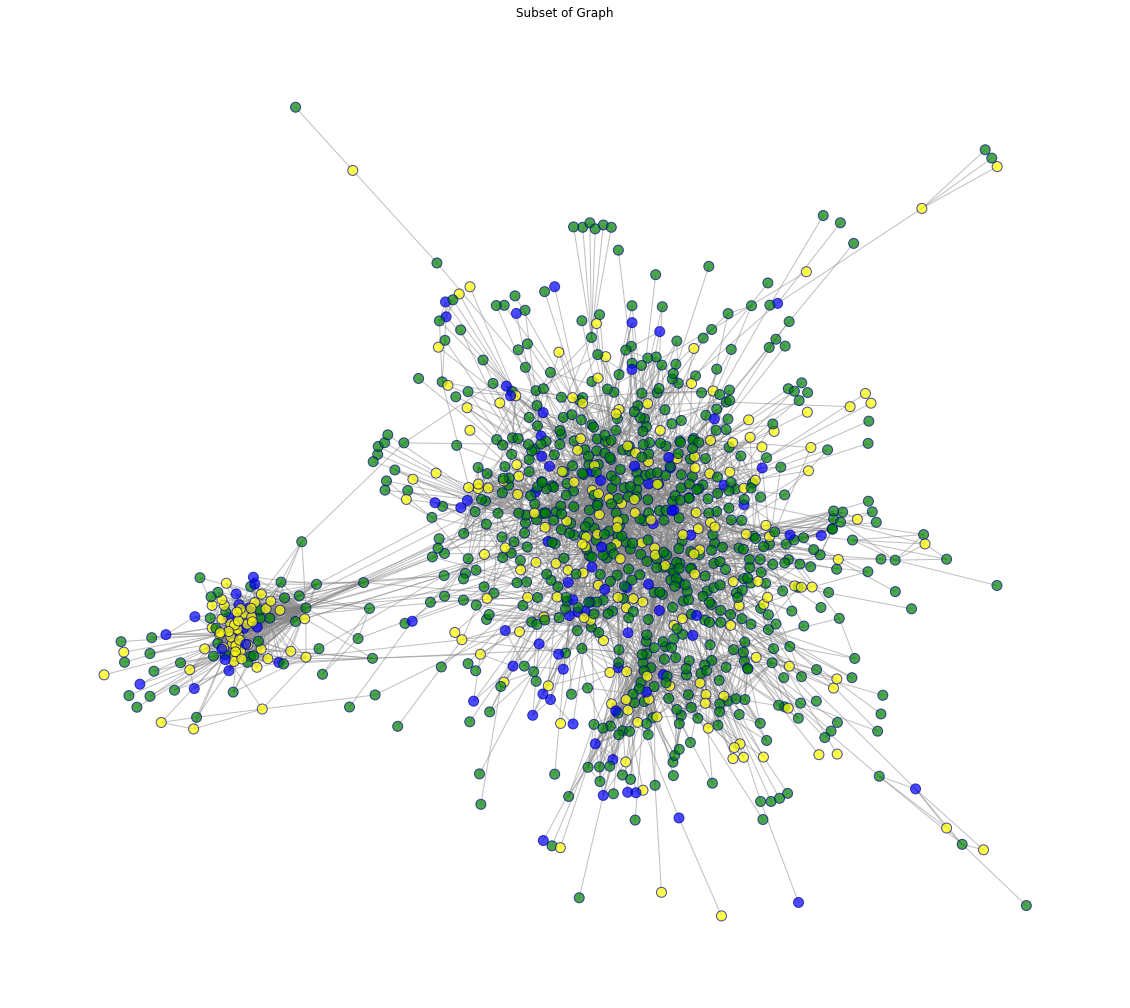

In [68]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 2: Create a graph representation
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 3: Plot a subset of the graph
subset_nodes = list(graph.nodes)[:1000]  # Select the first 1000 nodes for visualization

subset_graph = graph.subgraph(subset_nodes)
# Use Circular layout for better performance with large graphs
pos = nx.spring_layout(subset_graph)

# Define color mapping for the three clusters
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow'}

plt.figure(figsize=(20, 18))
print(node_encoding[node])
# Draw nodes with custom style
node_colors = [cluster_colors[node_encoding[node]] for node in subset_graph.nodes]
nx.draw_networkx_nodes(subset_graph, pos, node_color=node_colors, node_size=100, alpha=0.7, edgecolors='darkblue')

# Draw edges with custom style
nx.draw_networkx_edges(subset_graph, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels for nodes without node IDs
labels = {node: '' for node in subset_graph.nodes}
nx.draw_networkx_labels(subset_graph, pos, labels=labels, font_size=8, font_color='black')

plt.axis('off')
plt.title('Subset of Graph')
plt.show()